Idea: Customer Segmentation Analysis

Project Description:
The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.


Key Concepts and Challenges:

Data Collection: Obtain a dataset containing customer information, purchase history, and
relevant data.

Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle
any missing or inconsistent data.

Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of
purchases, etc.

Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment
customers based on behavior and purchase patterns.

Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer
segments.

Insights and Recommendations: Analyze characteristics of each segment and provide
insights.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [8]:
df=pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [9]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [11]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Descriptive Statistics
avg_purchase_value = df['MntTotal'].mean()
avg_purchase_frequency = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1).mean()
print(f"Average Purchase Value: {avg_purchase_value:.2f}")
print(f"Average Purchase Frequency: {avg_purchase_frequency:.2f}")




Average Purchase Value: 562.76
Average Purchase Frequency: 12.57


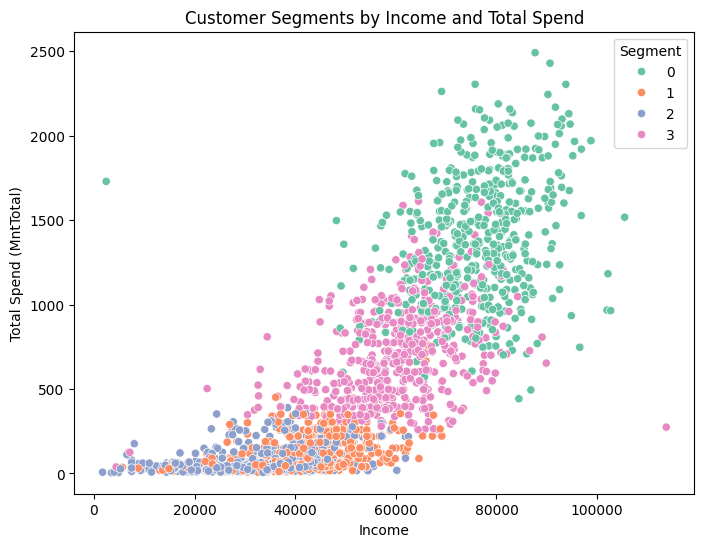

In [13]:
# Customer Segmentation using K-means
# Select features for clustering
features = df[['Income', 'MntTotal', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualization: Scatter plot of segments
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Segment', palette='Set2')
plt.title('Customer Segments by Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend (MntTotal)')
plt.legend(title='Segment')
plt.show()



In [15]:
# Insights: Show average metrics per segment
segment_summary = df.groupby('Segment')[['Income', 'MntTotal', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age']].mean()
print("Segment Summary:")
print(segment_summary)


Segment Summary:
               Income     MntTotal  NumWebPurchases  NumCatalogPurchases  \
Segment                                                                    
0        76061.209945  1372.092081         5.099448             6.432781   
1        41529.803318   132.011848         2.492891             0.900474   
2        31098.318386    73.177877         2.092676             0.487294   
3        59886.392294   685.087566         6.691769             2.861646   

         NumStorePurchases        Age  
Segment                                
0                 8.600368  51.808471  
1                 3.777251  60.905213  
2                 3.070254  41.919283  
3                 7.921191  53.919440  
